In [21]:
# Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Imort and clean data
df = pd.read_csv("students_performance.csv")
df = df.dropna()
df = df.iloc[:, [1, 4, 5, 6, 8, 9, 11, 14, 16, 18, 30]]

df

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,previous_gpa,stress_level,exam_score
0,26,7.645367,3.0,0.1,70.3,6.2,3,6.0,4.00,5.8,100
1,28,5.700000,0.5,0.4,88.4,7.2,4,6.8,4.00,5.8,99
2,17,2.400000,4.2,0.7,82.1,9.2,4,5.7,3.79,8.0,98
3,27,3.400000,4.6,2.3,79.3,4.2,3,8.5,4.00,4.6,100
4,25,4.700000,0.8,2.7,62.9,6.5,6,9.2,4.00,5.7,98
...,...,...,...,...,...,...,...,...,...,...,...
79995,16,3.700000,2.1,1.0,80.8,6.1,0,1.0,3.40,2.1,88
79996,16,1.200000,0.4,2.9,99.5,4.1,0,5.7,2.26,3.9,52
79997,26,4.100000,1.6,1.6,46.1,8.3,7,6.7,3.15,5.6,89
79998,23,3.800000,0.6,3.5,58.7,5.8,2,7.6,3.67,2.4,96


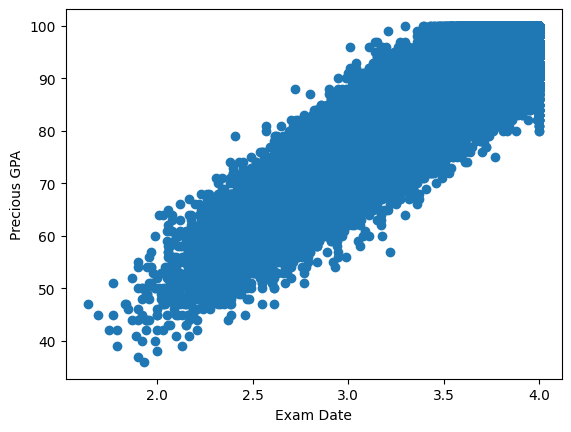

In [23]:
# Correlation of X variables
x_exam_date = df.previous_gpa
y_previous_gpa = df.exam_score
plt.scatter(x_exam_date, y_previous_gpa)
plt.xlabel("Exam Date")
plt.ylabel("Precious GPA")
plt.show()

In [24]:
# split the data

# Study_hours_per_day and social_media_hours
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
y = df.iloc[:, [-1]]  # Exam_score


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [25]:
# Train

# Creating the instance of the model RF
rf = RandomForestRegressor()

rf_model = rf.fit(X_train, y_train.squeeze())

In [26]:
# Test the model
y_predict = rf_model.predict(X_test)

In [27]:
# rmse and r2

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

print(rmse)
print(r2)

4.223158246995567
0.8657813870504983


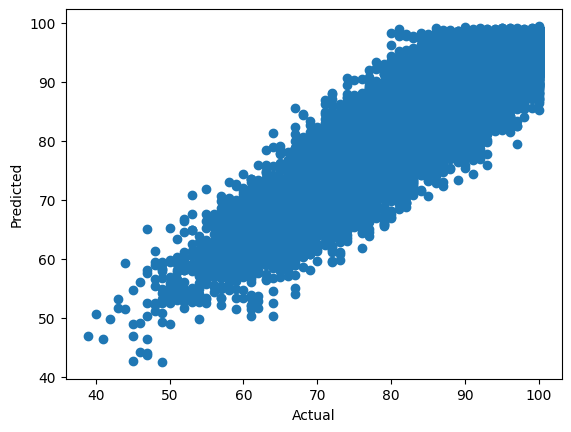

In [ ]:
# Comparing the correlation of the actual and the predicted values

plt.scatter(y_test, y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()